# EDA for Solar Energy sierraleone-bumbuna

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore


In [5]:
df = pd.read_csv(r'C:\Users\ASUS VIVO\Desktop\New folder\data\sierraleone-bumbuna.csv',encoding='latin')

In [6]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


# summary about our data

In [7]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

check missing values

In [9]:
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

luckily the dataset has no null values , so now check negative values

In [10]:
df[(df['GHI'] <0 )&(df['DNI']< 0)& (df['DHI']< 0)][['GHI','DNI','DHI']]

,GHI,DNI,DHI
0,-0.7,-0.1,-0.8
1,-0.7,-0.1,-0.8
2,-0.7,-0.1,-0.8
4,-0.7,-0.1,-0.8
5,-0.7,-0.1,-0.8
...,...,...,...
525595,-1.6,-0.1,-2.9
525596,-1.7,-0.1,-3.0
525597,-1.7,-0.1,-3.1
525598,-1.7,-0.2,-3.3


we can infer that our data set have negative values,we have to make all postive

In [11]:

def ab(x):
    x = abs(x)
    return x 

columns_to_modify = ['GHI', 'DNI', 'DHI']
df[columns_to_modify] = df[columns_to_modify].apply(ab)

In [12]:
df[(df['GHI'] <0 )&(df['DNI']< 0)& (df['DHI']< 0)][['GHI','DNI','DHI']]

,GHI,DNI,DHI


so now we can say all our data is positive

 # Time Series Analysis: 
Plot bar charts or line charts  of GHI, DNI, DHI, and Tamb over time to observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations.

In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

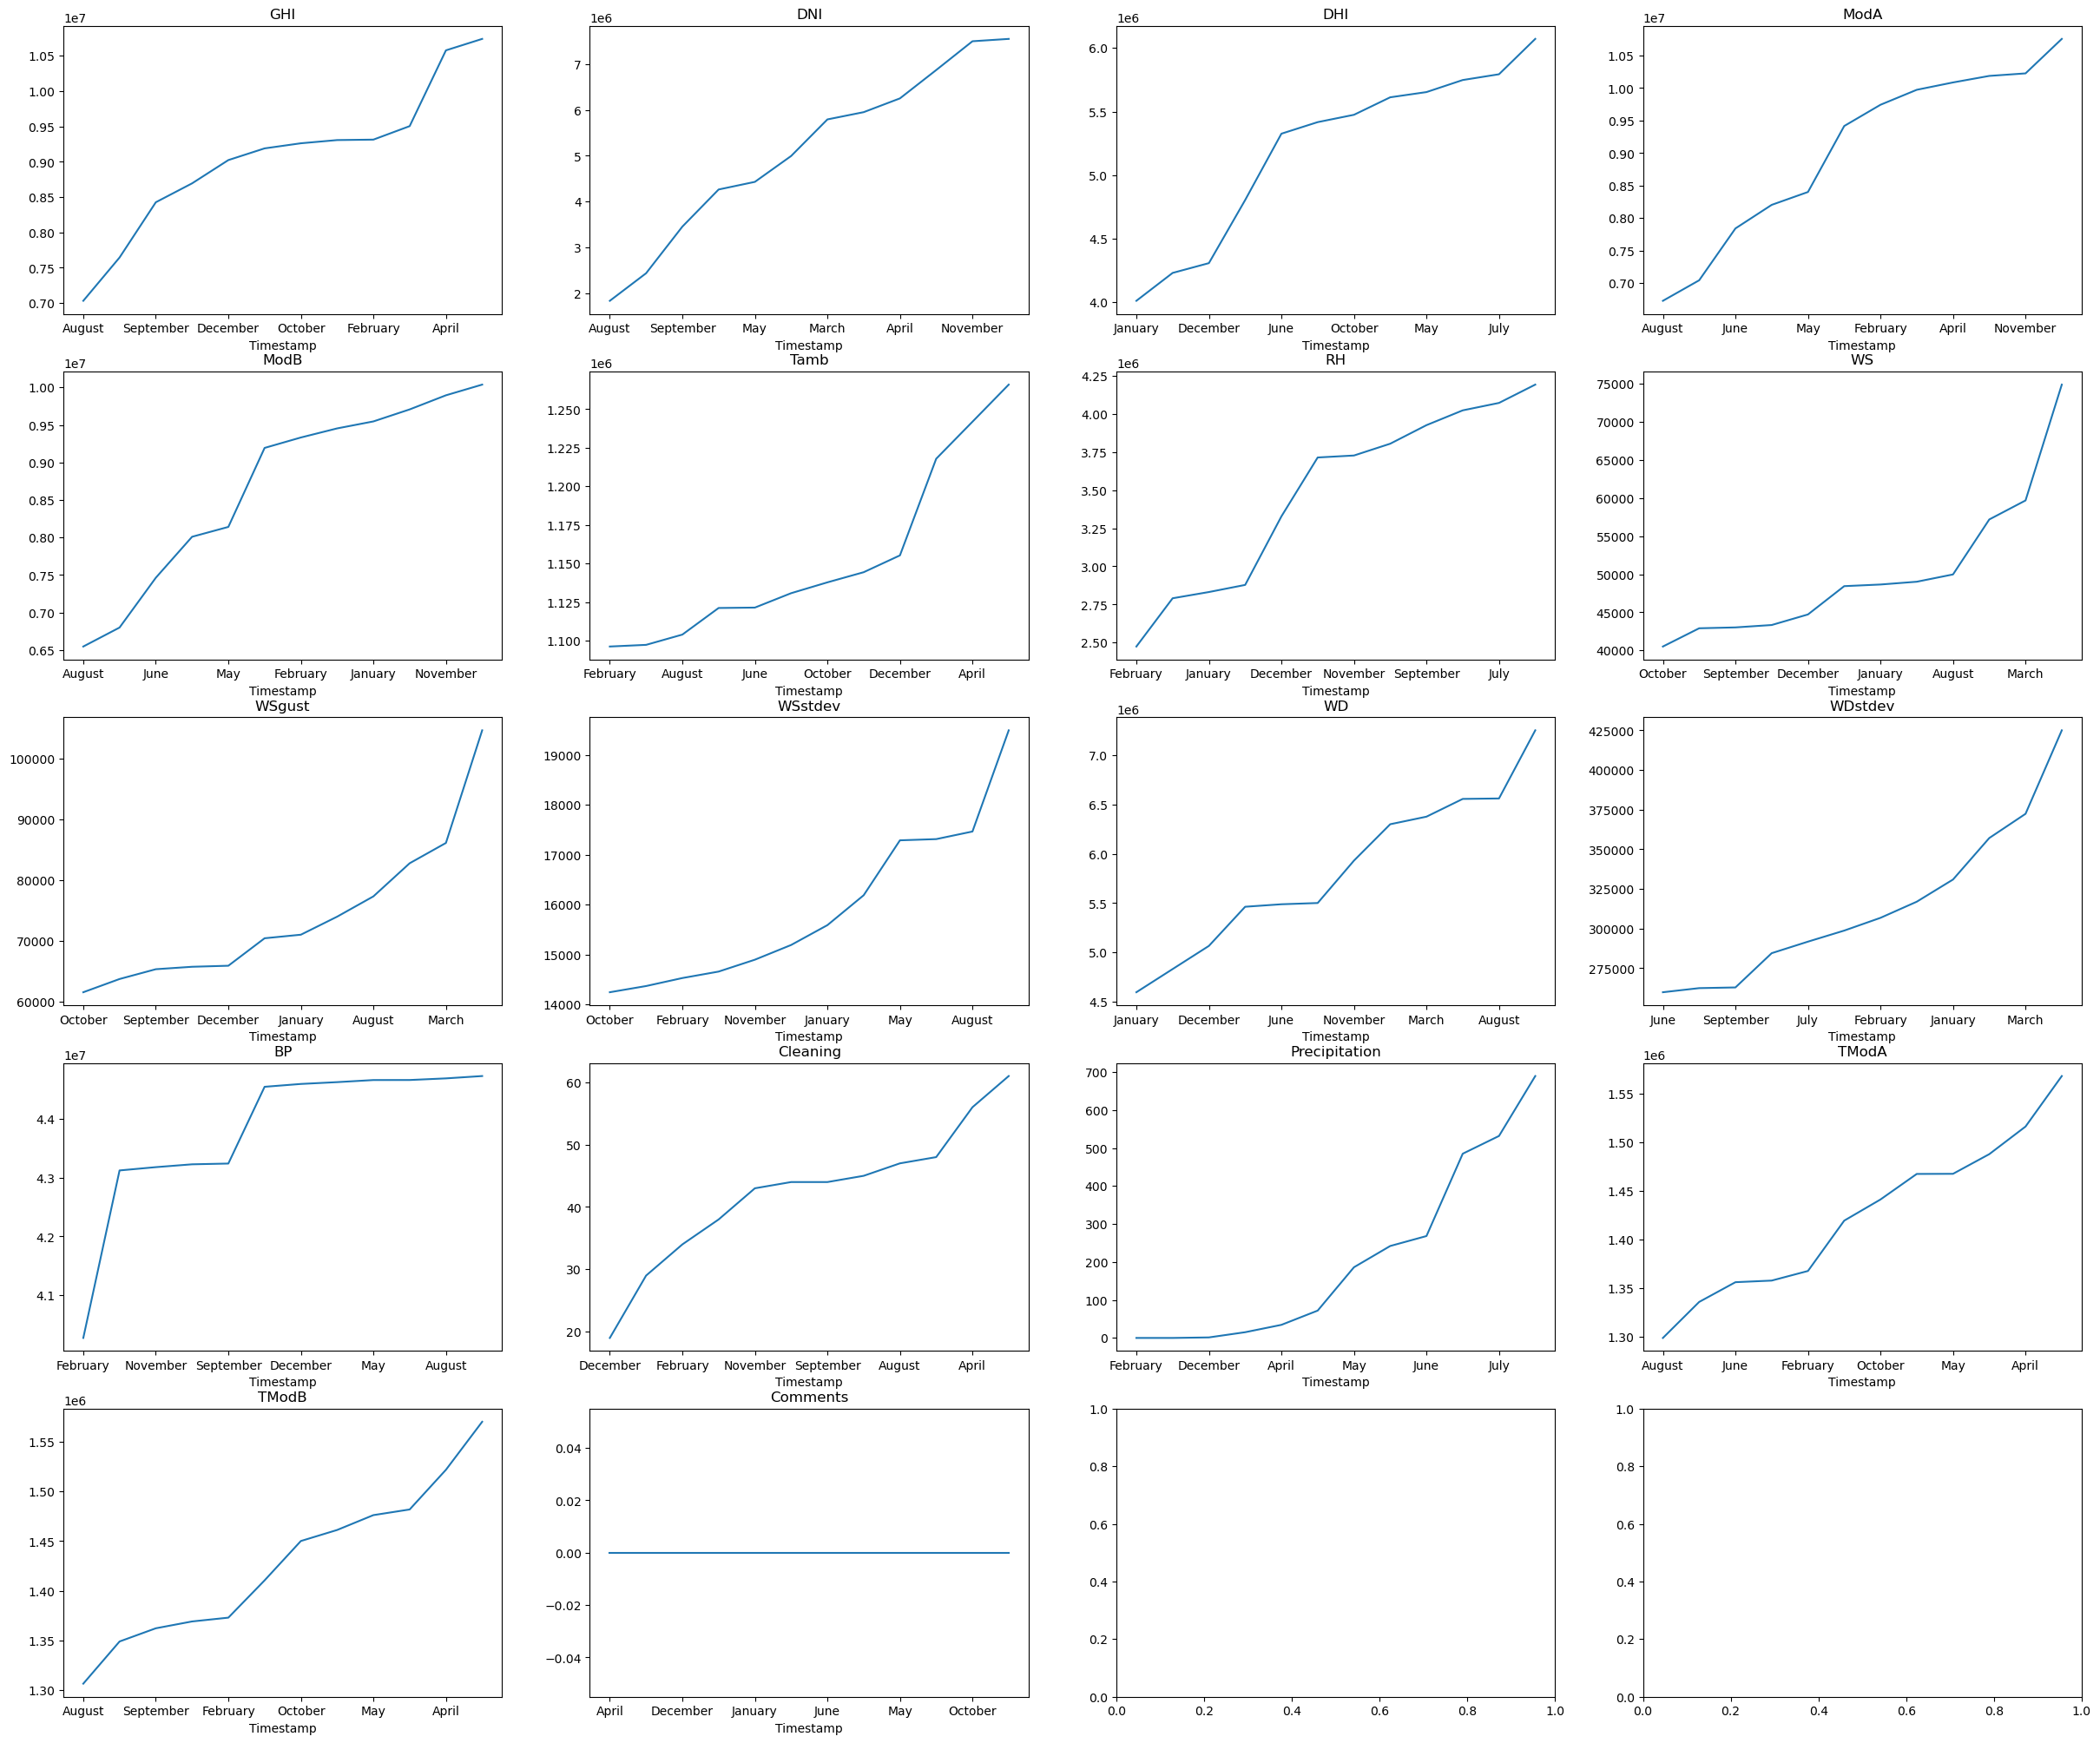

In [14]:
fig, axes=plt.subplots(5, 4, figsize=(30,25))
axes=axes.flatten()
list=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments']
for i,column in enumerate(list):
    df.groupby(df['Timestamp'].dt.strftime('%B'))[column].sum().sort_values().plot(kind='line',ax=axes[i])
    axes[i].set_title(column)
     

<Figure size 1000x1000 with 0 Axes>

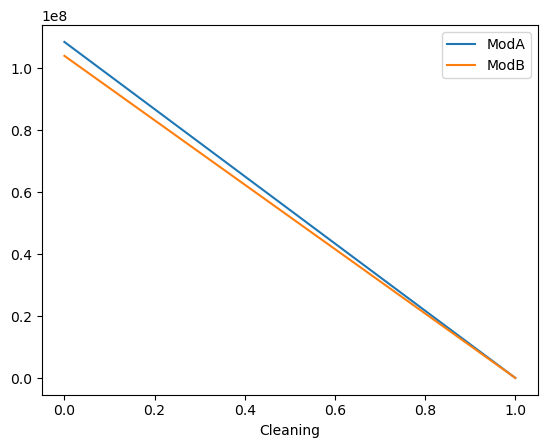

In [15]:
plt.figure(figsize=(10,10))
df.groupby('Cleaning')[['ModA','ModB']].sum().plot(kind='line')
plt.show()


cleaning has a significant effect on measure the irradiance of sensors

# Correlation Analysis:
Use correlation matrices or pair plots to visualize the correlations between solar radiation components (GHI, DNI, DHI) and temperature measures (TModA, TModB).

<Axes: >

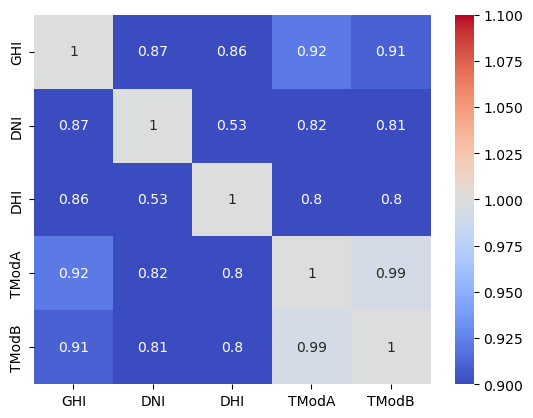

In [16]:
list=[ 'GHI', 'DNI', 'DHI','TModA', 'TModB']
sns.heatmap(df[list].corr(),vmax=1,vmin=1, cmap='coolwarm',annot=True)

Investigate the relationship between wind conditions (WS, WSgust, WD) and solar irradiance using scatter matrices.


Text(0.5, 0.98, 'Scatter matrics of Wind Conditions and solar Irradiance')

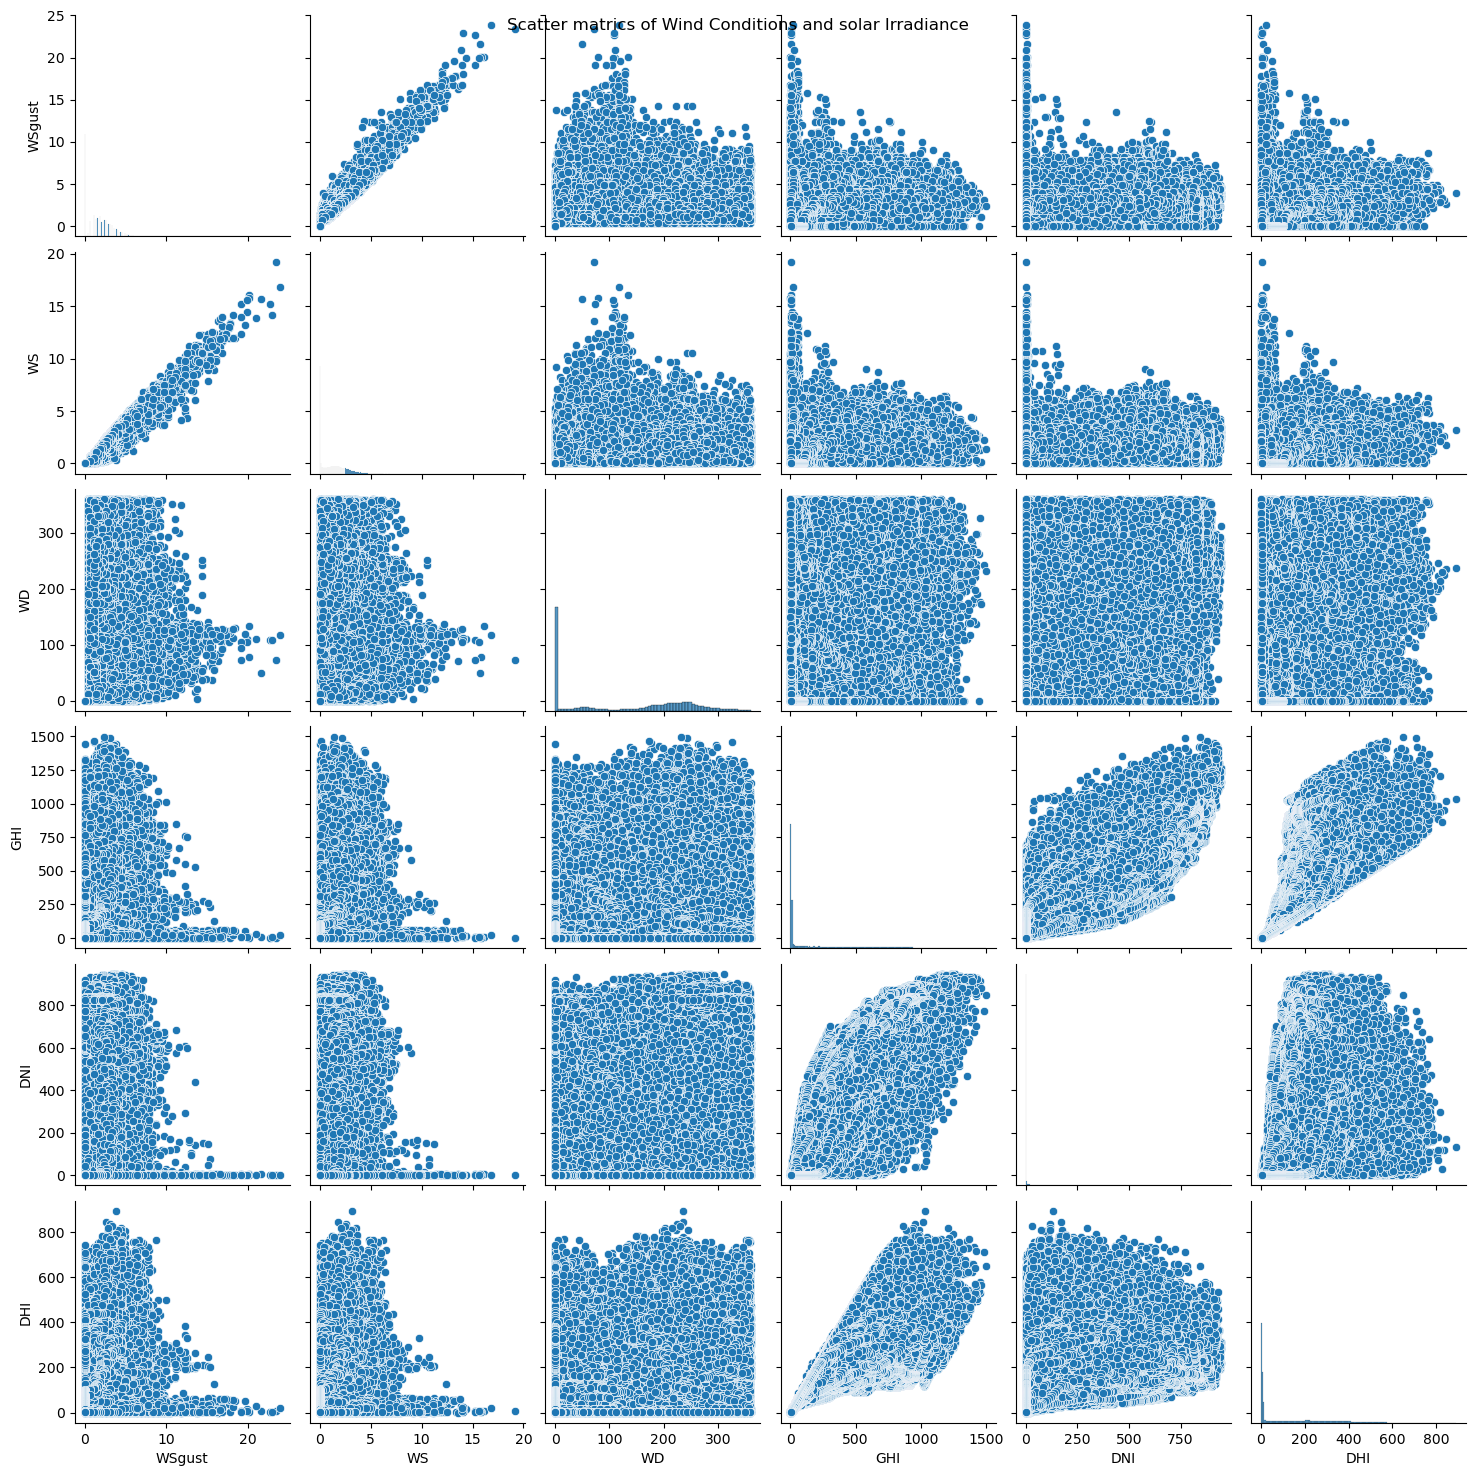

In [17]:
df_new=df[['WSgust','WS','WD','GHI','DNI','DHI']]
sns.pairplot(df_new)
plt.suptitle('Scatter matrics of Wind Conditions and solar Irradiance')

# Wind Analysis:
Use radial bar plots or wind roses Identify trends and significant wind events by showing the distribution of wind speed and direction, along with how variable the wind direction tends to be.


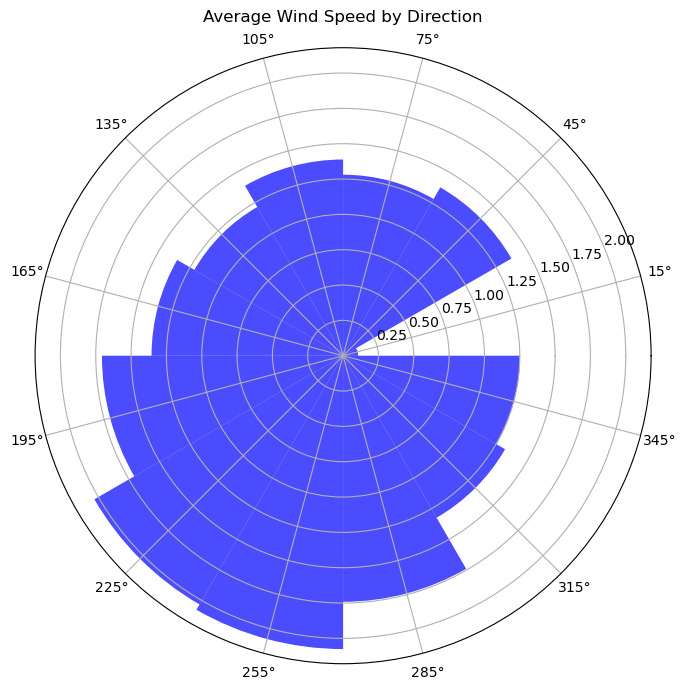

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


num_bins = 12
# Create bins for wind direction (0 to 360 degrees)
bins = np.linspace(0, 360, num_bins + 1)

# Calculate average wind speed for each bin
bin_centers = (bins[:-1] + bins[1:]) / 2
avg_speeds = []

for i in range(num_bins):
    avg_speed = df[(df['WD'] >= bins[i]) & (df['WD'] < bins[i + 1])]['WS'].mean()
    avg_speeds.append(avg_speed)

# Create a radial bar plot
angles = np.radians(bin_centers)  
radii = avg_speeds

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, radii, width=np.radians(360 / num_bins), color='blue', alpha=0.7)

# Add titles and labels
ax.set_title('Average Wind Speed by Direction', va='bottom')
ax.set_xticks(angles) 
ax.set_xticklabels([f"{int(center)}°" for center in bin_centers])  

# Show the plot
plt.show()

# Temperature analysis
Examine how relative humidity (RH) might influence temperature readings and solar radiation.


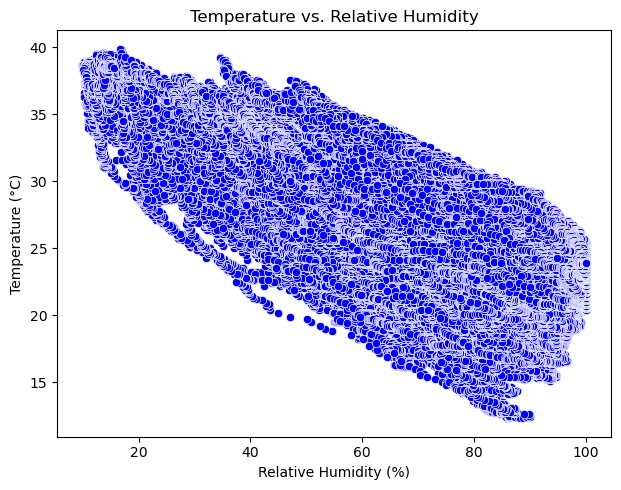

Correlation between RH and Temperature: -0.79


In [19]:

plt.figure(figsize=(12, 5))

# Temperature vs. RH
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='RH', y='Tamb', color='blue')
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')



plt.tight_layout()
plt.show()

# Correlation Analysis
correlation_rh_temp = df['RH'].corr(df['Tamb'])

print(f'Correlation between RH and Temperature: {correlation_rh_temp:.2f}')

# Histograms
 Create histograms for variables like GHI, DNI, DHI, WS, and temperatures to visualize the frequency distribution of these variables

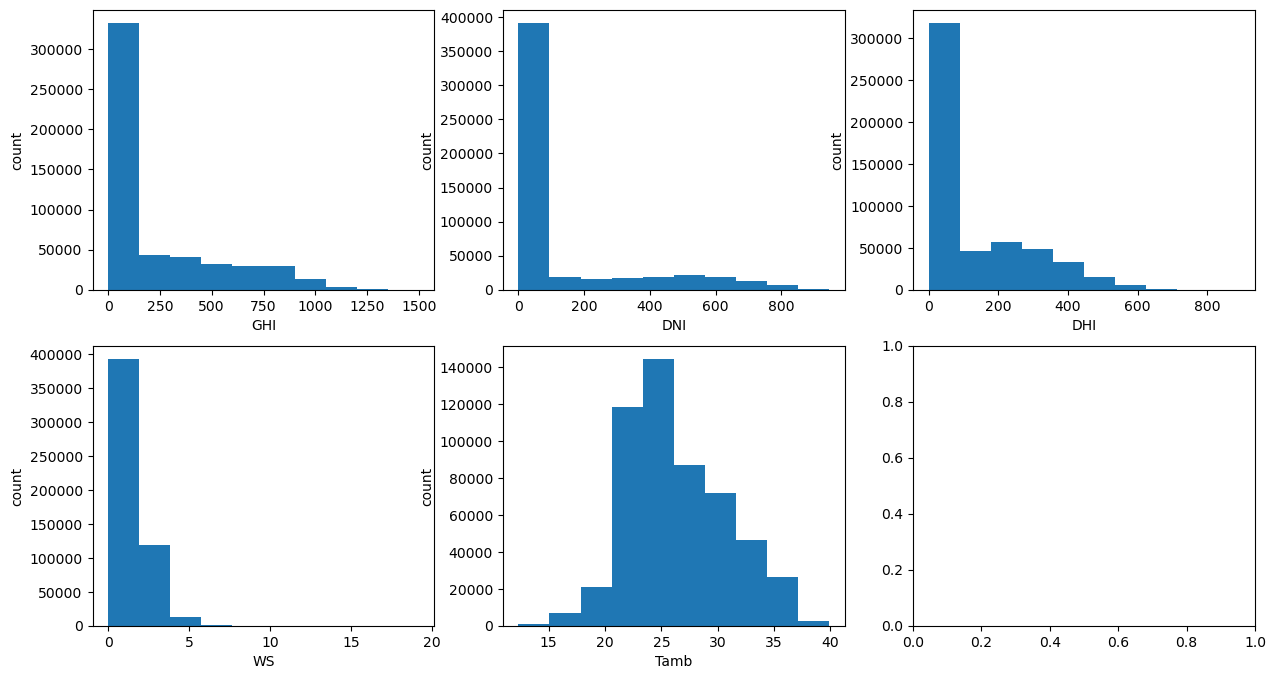

In [20]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
axes=axes.flatten()
list=['GHI','DNI','DHI','WS','Tamb']
for i,feature in enumerate(list):
    axes[i].hist(df[feature])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('count')
plt.show()


# Z score analysis
 Calculate Z-scores to flag data points that are significantly different from the mean


Identified Outliers:
                 Timestamp    GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
653    2021-10-30 10:54:00  814.0  257.0  594.3   878.0   856.0  25.9  85.3   
654    2021-10-30 10:55:00  826.0  263.5  599.6   883.0   861.0  26.0  85.4   
655    2021-10-30 10:56:00  851.0  285.0  605.9   912.0   890.0  26.0  84.2   
656    2021-10-30 10:57:00  823.0  254.8  603.9   878.0   856.0  26.0  85.3   
657    2021-10-30 10:58:00  810.0  244.5  598.8   864.0   843.0  26.1  85.7   
...                    ...    ...    ...    ...     ...     ...   ...   ...   
524845 2022-10-29 11:26:00  986.0  474.4  556.7  1035.0  1009.0  30.7  76.0   
524861 2022-10-29 11:42:00  817.0  289.9  547.2   861.0   839.0  30.0  76.2   
524862 2022-10-29 11:43:00  928.0  400.5  556.8   974.0   949.0  30.0  76.4   
524863 2022-10-29 11:44:00  925.0  396.3  556.9   972.0   946.0  30.2  76.2   
524864 2022-10-29 11:45:00  905.0  385.8  547.0   952.0   927.0  30.3  77.0   

         WS  WSgust  ...     W

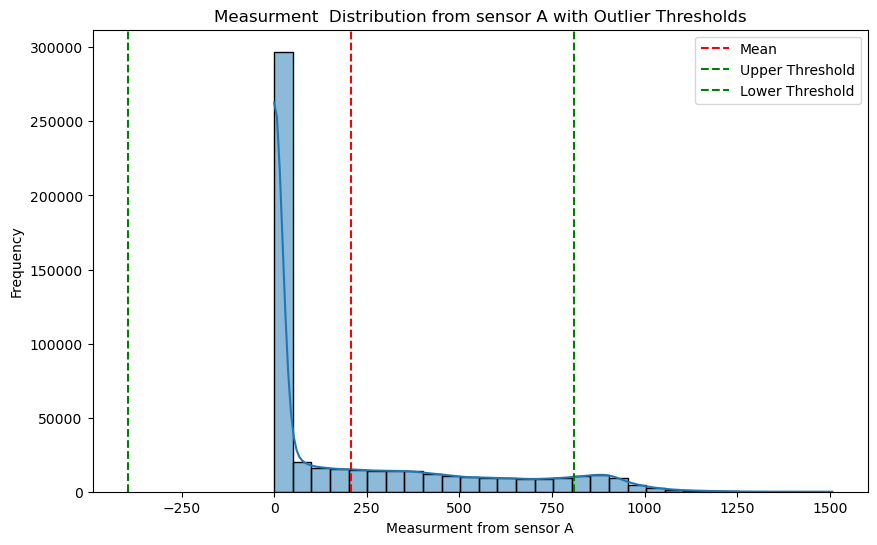

In [21]:

df['Z_Score'] = zscore(df['ModA'])


threshold = 2 

# Flag outliers
df['Outlier'] = df['Z_Score'].abs() > threshold

# Display the results
outliers = df[df['Outlier']]
print("Identified Outliers:")
print(outliers)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['ModA'], bins=30, kde=True)
plt.axvline(x=df['ModA'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=df['ModA'].mean() + threshold * df['ModA'].std(), color='g', linestyle='--', label='Upper Threshold')
plt.axvline(x=df['ModA'].mean() - threshold * df['ModA'].std(), color='g', linestyle='--', label='Lower Threshold')
plt.title('Measurment  Distribution from sensor A with Outlier Thresholds')
plt.xlabel('Measurment from sensor A')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Identified Outliers:
                 Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH  \
653    2021-10-30 10:54:00  814.0  257.0  594.3  878.0  856.0  25.9  85.3   
654    2021-10-30 10:55:00  826.0  263.5  599.6  883.0  861.0  26.0  85.4   
655    2021-10-30 10:56:00  851.0  285.0  605.9  912.0  890.0  26.0  84.2   
656    2021-10-30 10:57:00  823.0  254.8  603.9  878.0  856.0  26.0  85.3   
657    2021-10-30 10:58:00  810.0  244.5  598.8  864.0  843.0  26.1  85.7   
...                    ...    ...    ...    ...    ...    ...   ...   ...   
524861 2022-10-29 11:42:00  817.0  289.9  547.2  861.0  839.0  30.0  76.2   
524862 2022-10-29 11:43:00  928.0  400.5  556.8  974.0  949.0  30.0  76.4   
524863 2022-10-29 11:44:00  925.0  396.3  556.9  972.0  946.0  30.2  76.2   
524864 2022-10-29 11:45:00  905.0  385.8  547.0  952.0  927.0  30.3  77.0   
524865 2022-10-29 11:46:00  768.3  258.6  526.6  805.0  783.3  30.4  76.8   

         WS  WSgust  ...     WD  WDstdev    BP  Cleani

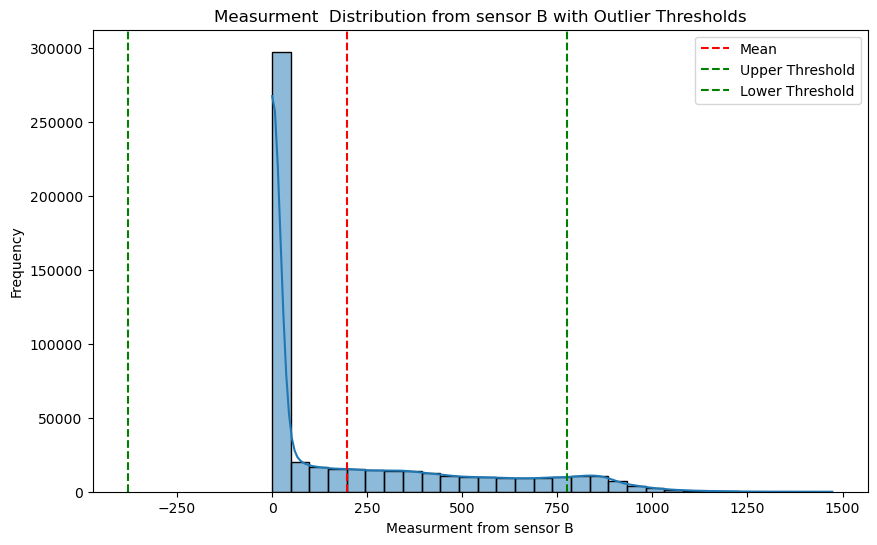

In [22]:

df['Z_Score'] = zscore(df['ModB'])


threshold = 2 

# Flag outliers
df['Outlier'] = df['Z_Score'].abs() > threshold

# Display the results
outliers = df[df['Outlier']]
print("Identified Outliers:")
print(outliers)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['ModB'], bins=30, kde=True)
plt.axvline(x=df['ModB'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=df['ModB'].mean() + threshold * df['ModB'].std(), color='g', linestyle='--', label='Upper Threshold')
plt.axvline(x=df['ModB'].mean() - threshold * df['ModB'].std(), color='g', linestyle='--', label='Lower Threshold')
plt.title('Measurment  Distribution from sensor B with Outlier Thresholds')
plt.xlabel('Measurment from sensor B')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Identified Outliers:
                 Timestamp    GHI   DNI    DHI   ModA   ModB  Tamb    RH   WS  \
840    2021-10-30 14:01:00  430.9  48.0  387.9  445.3  434.6  28.9  78.7  3.8   
841    2021-10-30 14:02:00  447.4  66.0  389.0  462.7  451.5  28.8  77.8  4.0   
842    2021-10-30 14:03:00  408.4  25.1  386.0  419.4  408.9  28.7  77.3  3.7   
843    2021-10-30 14:04:00  397.2  12.2  385.9  408.9  398.7  28.6  78.9  4.0   
844    2021-10-30 14:05:00  424.8  37.6  391.8  439.9  428.9  28.6  79.1  3.9   
...                    ...    ...   ...    ...    ...    ...   ...   ...  ...   
523797 2022-10-28 17:58:00   20.1   0.7   18.6   24.1   22.7  27.2  83.6  3.8   
523798 2022-10-28 17:59:00   21.9   0.9   20.5   26.1   24.5  27.0  82.7  4.2   
523800 2022-10-28 18:01:00   22.4   1.4   21.2   27.9   26.3  26.6  82.4  4.8   
523801 2022-10-28 18:02:00   21.6   1.7   20.3   27.9   26.4  26.4  82.6  4.5   
523802 2022-10-28 18:03:00   19.9   1.7   18.8   27.2   25.8  26.3  83.1  3.8   

      

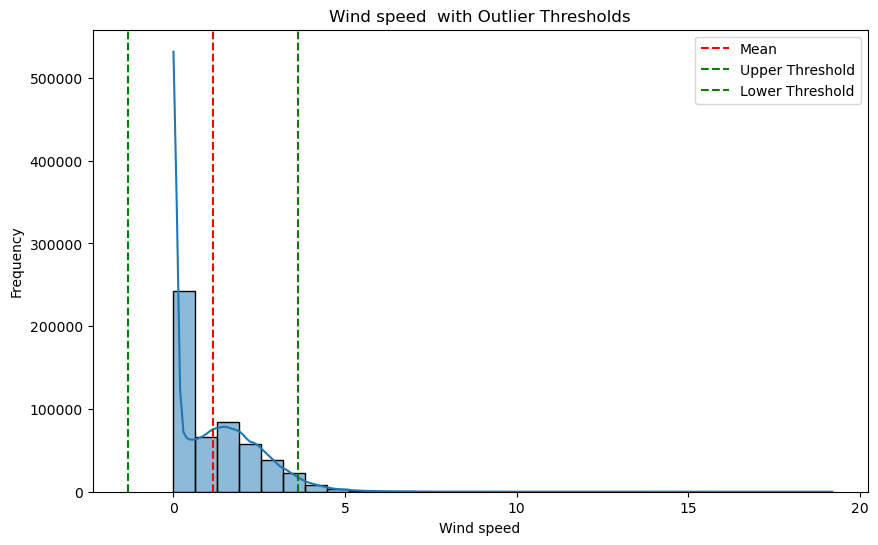

In [23]:


df['Z_Score'] = zscore(df['WS'])


threshold = 2 

# Flag outliers
df['Outlier'] = df['Z_Score'].abs() > threshold


outliers = df[df['Outlier']]
print("Identified Outliers:")
print(outliers)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['WS'], bins=30, kde=True)
plt.axvline(x=df['WS'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=df['WS'].mean() + threshold * df['WS'].std(), color='g', linestyle='--', label='Upper Threshold')
plt.axvline(x=df['WS'].mean() - threshold * df['WS'].std(), color='g', linestyle='--', label='Lower Threshold')
plt.title('Wind speed  with Outlier Thresholds')
plt.xlabel('Wind speed')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Identified Outliers:
                 Timestamp    GHI   DNI    DHI   ModA   ModB  Tamb    RH   WS  \
841    2021-10-30 14:02:00  447.4  66.0  389.0  462.7  451.5  28.8  77.8  4.0   
844    2021-10-30 14:05:00  424.8  37.6  391.8  439.9  428.9  28.6  79.1  3.9   
846    2021-10-30 14:07:00  440.5  56.9  390.5  456.5  445.1  28.6  79.1  4.0   
854    2021-10-30 14:15:00  379.6  53.1  335.4  386.4  375.6  28.5  77.8  4.3   
855    2021-10-30 14:16:00  354.3  39.0  321.9  358.9  348.2  28.4  77.4  4.1   
...                    ...    ...   ...    ...    ...    ...   ...   ...  ...   
523797 2022-10-28 17:58:00   20.1   0.7   18.6   24.1   22.7  27.2  83.6  3.8   
523798 2022-10-28 17:59:00   21.9   0.9   20.5   26.1   24.5  27.0  82.7  4.2   
523799 2022-10-28 18:00:00   22.8   1.0   21.7   27.6   26.0  26.8  82.3  3.3   
523800 2022-10-28 18:01:00   22.4   1.4   21.2   27.9   26.3  26.6  82.4  4.8   
523801 2022-10-28 18:02:00   21.6   1.7   20.3   27.9   26.4  26.4  82.6  4.5   

      

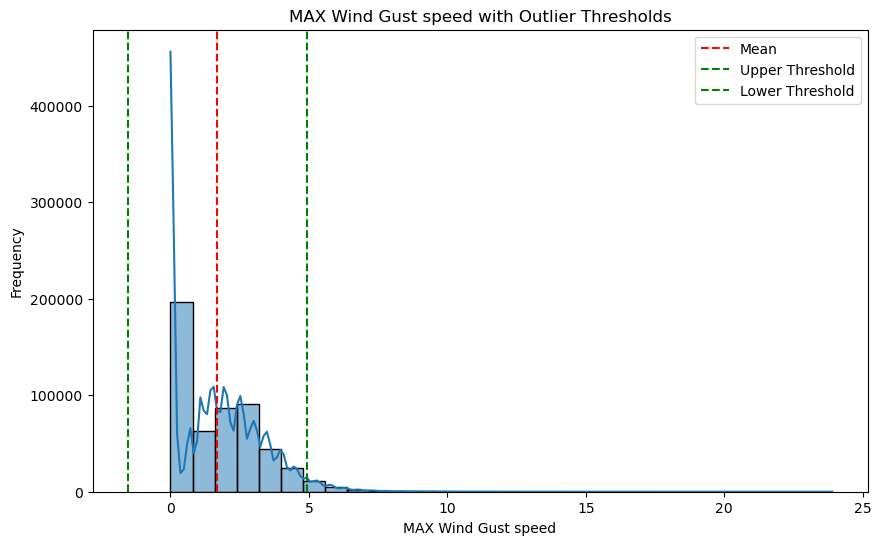

In [24]:
	
 
 
df['Z_Score'] = zscore(df['WSgust'])


threshold = 2 

# Flag outliers
df['Outlier'] = df['Z_Score'].abs() > threshold


outliers = df[df['Outlier']]
print("Identified Outliers:")
print(outliers)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['WSgust'], bins=30, kde=True)
plt.axvline(x=df['WSgust'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=df['WSgust'].mean() + threshold * df['WSgust'].std(), color='g', linestyle='--', label='Upper Threshold')
plt.axvline(x=df['WSgust'].mean() - threshold * df['WSgust'].std(), color='g', linestyle='--', label='Lower Threshold')
plt.title('MAX Wind Gust speed with Outlier Thresholds')
plt.xlabel('MAX Wind Gust speed')
plt.ylabel('Frequency')
plt.legend()
plt.show()
 
 

# bubble chart 
to explore complex relationships between variables, such as GHI vs. Tamb vs. WS, with bubble size representing an additional variable like RH or BP (Barometric Pressure)

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


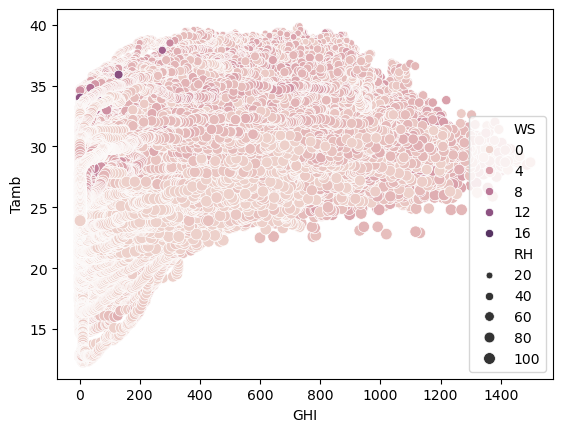

In [25]:
figsize=(10,5)
sns.scatterplot(
    data=df,
    x='GHI',
    y='Tamb',
    hue='WS',
    size='RH',
)
plt.show()


In [27]:
df.drop('Comments',axis=1,inplace=True)

In [28]:
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Z_Score,Outlier
0,2021-10-30 00:01:00,0.7,0.1,0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,-1.046105,False
1,2021-10-30 00:02:00,0.7,0.1,0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,-1.046105,False
2,2021-10-30 00:03:00,0.7,0.1,0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,-1.046105,False
3,2021-10-30 00:04:00,0.7,0.0,0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,-1.046105,False
4,2021-10-30 00:05:00,0.7,0.1,0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,-1.046105,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56:00,1.6,0.1,2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,-1.046105,False
525596,2022-10-29 23:57:00,1.7,0.1,3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,-1.046105,False
525597,2022-10-29 23:58:00,1.7,0.1,3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,-1.046105,False
525598,2022-10-29 23:59:00,1.7,0.2,3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,-1.046105,False


# summary
The EDA provides insights into the factors influencing solar energy production, highlighting the importance of irradiance, temperature, humidity, wind conditions, and precipitation. This analysis can inform strategies for optimizing solar energy systems, improving module efficiency, and enhancing overall solar energy utilization. Further investigations could focus on predictive modeling based on these variables to forecast solar energy generation more accurately.